In [1]:
!pip install gymnasium gym-anytrading stable_baselines3 shimmy sb3_contrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 11.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
from sklearn.preprocessing import MinMaxScaler
from sb3_contrib import RecurrentPPO
import matplotlib.pyplot as plt

## Load data

In [3]:
data = pd.read_csv('/content/EUR_USD Historical Data.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Price,Open,High,Low,Vol.,Change %
0,02/12/2024,1.0762,1.0798,1.0806,1.0761,NaN,-0.33%
1,02/11/2024,1.0798,1.0781,1.0798,1.0781,NaN,0.15%
2,02/09/2024,1.0782,1.0779,1.0796,1.0761,NaN,0.06%
3,02/08/2024,1.0776,1.0772,1.0790,1.0741,NaN,0.05%
4,02/07/2024,1.0771,1.0755,1.0784,1.0753,NaN,0.16%
...,...,...,...,...,...,...,...
287,01/06/2023,1.0644,1.0522,1.0648,1.0483,NaN,1.18%
288,01/05/2023,1.0520,1.0604,1.0632,1.0515,NaN,-0.75%
289,01/04/2023,1.0599,1.0552,1.0636,1.0540,NaN,0.50%
290,01/03/2023,1.0546,1.0663,1.0684,1.0519,NaN,-1.09%


In [5]:
data = data.drop('Vol.', axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Price,Open,High,Low,Change %
0,02/12/2024,1.0762,1.0798,1.0806,1.0761,-0.33%
1,02/11/2024,1.0798,1.0781,1.0798,1.0781,0.15%
2,02/09/2024,1.0782,1.0779,1.0796,1.0761,0.06%
3,02/08/2024,1.0776,1.0772,1.0790,1.0741,0.05%
4,02/07/2024,1.0771,1.0755,1.0784,1.0753,0.16%
...,...,...,...,...,...,...
287,01/06/2023,1.0644,1.0522,1.0648,1.0483,1.18%
288,01/05/2023,1.0520,1.0604,1.0632,1.0515,-0.75%
289,01/04/2023,1.0599,1.0552,1.0636,1.0540,0.50%
290,01/03/2023,1.0546,1.0663,1.0684,1.0519,-1.09%


In [7]:
data.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Price,Open,High,Low,Change %
Date,,,,,
02/12/2024,1.0762,1.0798,1.0806,1.0761,-0.33%
02/11/2024,1.0798,1.0781,1.0798,1.0781,0.15%
02/09/2024,1.0782,1.0779,1.0796,1.0761,0.06%
02/08/2024,1.0776,1.0772,1.0790,1.0741,0.05%
02/07/2024,1.0771,1.0755,1.0784,1.0753,0.16%
...,...,...,...,...,...
01/06/2023,1.0644,1.0522,1.0648,1.0483,1.18%
01/05/2023,1.0520,1.0604,1.0632,1.0515,-0.75%
01/04/2023,1.0599,1.0552,1.0636,1.0540,0.50%


In [9]:
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object

## Indicator

In [10]:
# MACD (Moving Average Convergence Divergence)
def MACD(dataset, short_window, long_window, signal_window):
    # Calculate Exponential Moving Average (EMA) for short and long windows
    dataset['EMA_short'] = dataset['Price'].ewm(span=short_window, adjust=False).mean()  # Calculate short EMA
    dataset['EMA_long'] = dataset['Price'].ewm(span=long_window, adjust=False).mean()    # Calculate long EMA

    # Calculate MACD by subtracting long EMA from short EMA
    dataset['MACD'] = dataset['EMA_short'] - dataset['EMA_long']  # Calculate MACD line

    # Calculate the signal line (another EMA) for the MACD
    dataset['Signal'] = dataset['MACD'].ewm(span=signal_window, adjust=False).mean()  # Calculate signal line

    # Remove the intermediate EMA values, keeping only MACD and Signal columns
    dataset.drop(['EMA_short', 'EMA_long'], axis=1, inplace=True)  # Remove temporary EMA columns

In [11]:
# RSI (Relative Strength Index)
def RSI(dataset, window):
    # Calculate the differences between consecutive closing prices
    diff = dataset['Price'].diff()  # Calculate price differences

    # Separate gains (positive differences) and losses (negative differences)
    gain = diff.where(diff > 0, 0)  # Get positive differences as gains
    loss = -diff.where(diff < 0, 0)  # Get negative differences as losses

    # Calculate average gains and losses using a rolling window
    avg_gain = gain.rolling(window=window).mean()  # Calculate average gains
    avg_loss = loss.rolling(window=window).mean()  # Calculate average losses

    # Calculate the Relative Strength (RS) by dividing average gains by average losses
    rs = avg_gain / avg_loss  # Calculate Relative Strength

    # Calculate RSI by applying the RSI formula
    rsi = 100 - (100 / (1 + rs))  # Calculate RSI values

    # Add the calculated RSI values as a new column in the dataset
    dataset['RSI'] = rsi  # Add RSI values to the dataset

## Data pre-processing

In [12]:
cleaned_df = data.copy() # Copy the dataset

eps=0.001

# Apply Logarithmic Transformation
cleaned_df['Price'] = np.log(cleaned_df.pop('Price')+eps)
cleaned_df['Open'] = np.log(cleaned_df.pop('Open')+eps)
cleaned_df['High'] = np.log(cleaned_df.pop('High')+eps)
cleaned_df['Low'] = np.log(cleaned_df.pop('Low')+eps)

In [13]:
cleaned_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Change %,Price,Open,High,Low
Date,,,,,
02/12/2024,-0.33%,0.074365,0.077702,0.078441,0.074272
02/11/2024,0.15%,0.077702,0.076127,0.077702,0.076127
02/09/2024,0.06%,0.076220,0.075942,0.077516,0.074272
02/08/2024,0.05%,0.075664,0.075293,0.076961,0.072414
02/07/2024,0.16%,0.075200,0.073715,0.076405,0.073529
...,...,...,...,...,...
01/06/2023,1.18%,0.063350,0.051833,0.063726,0.048123
01/05/2023,-0.75%,0.051643,0.059589,0.062223,0.051168
01/04/2023,0.50%,0.059118,0.054678,0.062599,0.053541


In [14]:
MACD(cleaned_df, 12, 26, 9)
RSI(cleaned_df, 14)
cleaned_df['MACD_Signal_diff'] = cleaned_df['MACD'] - cleaned_df['Signal']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
missing_values_count = cleaned_df.isna().sum()
missing_values_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Change %             0
Price                0
Open                 0
High                 0
Low                  0
MACD                 0
Signal               0
RSI                 13
MACD_Signal_diff     0
dtype: int64

In [16]:
cleaned_df.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
missing_values_count = cleaned_df.isna().sum()
missing_values_count

Change %            0
Price               0
Open                0
High                0
Low                 0
MACD                0
Signal              0
RSI                 0
MACD_Signal_diff    0
dtype: int64

## Environment

In [18]:
BALANCE_USD = 10000
INITIAL_BALANCE = np.log(BALANCE_USD+eps)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
INITIAL_BALANCE

9.210340471976178

In [20]:
class TradingEnv(gym.Env):

    def __init__(self, df, initial_balance=INITIAL_BALANCE, max_shares=1, transaction_cost_percentage=0.00000000000000001):
        super(TradingEnv, self).__init__()

        self.df = df
        self.current_step = 0
        self.max_steps = len(df) - 1    # Total number of steps / lenght of the dataset

        self.initial_balance = initial_balance
        self.max_shares = max_shares    # Number of shares can be bought with the price
        self.transaction_cost_percentage = transaction_cost_percentage  # Cost for each transaction

        self.action_space = gym.spaces.Discrete(3)  # 3 actions: Buy (0), Sell (1), Hold (2)
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(11,), dtype=np.float32)

        self.balance = self.initial_balance   # Changing for updata current balance
        self.bought = False
        self.sold = False
        self.hold = False
        self.shares_held = 0
        self.fx_price = 0
        self.total_profit = 0

    def reset(self):

        """Reset the environment each time the agent completes iteration through the dataset"""

        self.current_step = 0
        self.balance = self.initial_balance
        self.shares_held = 0
        self.total_profit = 0
        self.fx_price = self.df['Price'].iloc[self.current_step]
        return self._get_observation()

    def step(self, action):

        """Method for taking action"""

        self.current_step += 1  # Iterating through the dataset features
        self.fx_price = self.df['Price'].iloc[self.current_step]
        reward = 0.0

        if action == 0:  # Buy
            self._buy_shares()

        elif action == 1:  # Sell
            self._sell_shares()

        else:
            self.hold = True
            reward = 0.001   # Giving a small positive reward got holding in essential case
            pass

        # Only calculate reward when the agent performs Buy and Sell action
        if (self.bought or self.sold) and self.hold == False:
            reward = self._calculate_reward()

        done = self.current_step >= self.max_steps

        observation = self._get_observation()
        return observation, reward, done, {}

    def _get_observation(self):

        """The whole observation space the agent can interact with.
        Includes prices and technical indicators"""

        observation = np.array([
            self.df['Open'].iloc[self.current_step],
            self.df['Low'].iloc[self.current_step],
            self.df['High'].iloc[self.current_step],
            self.df['Price'].iloc[self.current_step],
            self.df['MACD'].iloc[self.current_step],
            self.df['Signal'].iloc[self.current_step],
            self.df['MACD_Signal_diff'].iloc[self.current_step],
            self.df['RSI'].iloc[self.current_step],
            self.balance,
            self.shares_held,
            self.fx_price,
        ], dtype=np.float32)

        return observation

    def _buy_shares(self):

        """Environment conditions for a buy action"""

        try:

            max_shares_affordable = int(self.balance / (self.fx_price * (1 + self.transaction_cost_percentage)))
            shares_to_buy = np.random.randint(1, max_shares_affordable + 1)  # Choose a random number of shares to buy
            transaction_cost = shares_to_buy * self.fx_price * self.transaction_cost_percentage
            self.balance -= (shares_to_buy * self.fx_price) + transaction_cost
            self.shares_held += shares_to_buy
            self.bought = True
            self.sold = False
            self.hold = False
        except:
            self.bought = False
            pass

    def _sell_shares(self):

        """Environment conditions for a sell action"""

        if self.shares_held > 0:
            shares_to_sell = np.random.randint(1, self.shares_held + 1)  # Choose a random number of shares to sell
            self.balance += (shares_to_sell * self.fx_price) * (1 - self.transaction_cost_percentage)
            self.shares_held -= shares_to_sell
            self.sold = True
            self.bought = False
            self.hold = False
        else:
            self.sold = False
            pass

    def _calculate_reward(self):

        """Reward calculation based on the agent's action"""

        current_balance = self.balance + (self.shares_held * self.fx_price)
        profit = current_balance - self.initial_balance     # Profit calculation
        reward = (profit - self.total_profit) * 100    # Reward scaled in terms or 100
        self.total_profit = profit  # updating profit
        return reward


    def render(self):

        """Information rendering to the screen"""

        print(f"Forex Price: {np.exp(self.fx_price)-eps} EUR/USD")
        print(f"Account Initial Balance: {np.exp(self.initial_balance)-eps}$")
        print(f"Account Balance: {np.exp(self.balance)-eps}$")
        print(f"Number of Shares: {self.shares_held}")
        print(f"Profit in percentage: {np.exp(self.total_profit)-eps}")
        # if (np.exp(self.total_profit)-eps) <1.0:
        print(f"Profit in USD: {((np.exp(self.total_profit)-eps)-1)*(np.exp(self.initial_balance)-eps)}")
        print("--------------------------")

### Testing env

In [21]:
env = TradingEnv(cleaned_df)
observation = env.reset()
done = False

In [22]:
def test_env(action_):
    action = action_  # Buy action
    next_observation, reward, done, info = env.step(action)

    print("Reward:",reward)
    print("Action:",action)
    env.render()
    observation = next_observation

In [23]:
test_env(0)

Reward: 0.0
Action: 0
Forex Price: 1.0883 EUR/USD
Account Initial Balance: 10000.0$
Account Balance: 6.386262001762364$
Number of Shares: 86
Profit in percentage: 0.999
Profit in USD: -10.000000000000009
--------------------------


In [24]:
test_env(1)

Reward: -25.301112300721762
Action: 1
Forex Price: 1.0851 EUR/USD
Account Initial Balance: 10000.0$
Account Balance: 241.8715223475227$
Number of Shares: 42
Profit in percentage: 0.7754592452139166
Profit in USD: -2245.407547860834
--------------------------


## Training Model

In [25]:
model = RecurrentPPO('MlpLstmPolicy', env, verbose=1, ent_coef=0.70)
model.learn(total_timesteps=100000)

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
|    value_loss           | 4.69e+03     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 278          |
|    ep_rew_mean          | -6.58        |
| time/                   |              |
|    fps                  | 65           |
|    iterations           | 545          |
|    time_elapsed         | 1065         |
|    total_timesteps      | 69760        |
| train/                  |              |
|    approx_kl            | 5.125534e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | 0.261        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.89e+03     |
|    n_updates            | 5440         |
|    policy_gradient_loss | -0.000249    |
|    value_loss           | 5.85e+03     |
---

## Agent trading

In [26]:
observation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([8.5718878e-02, 7.9827301e-02, 8.7369643e-02, 8.2132831e-02,
       1.9335529e-03, 1.1987429e-03, 7.3481008e-04, 6.2505222e+01,
       9.2103405e+00, 0.0000000e+00, 8.2132831e-02], dtype=float32)

In [27]:
env = TradingEnv(cleaned_df)
observation = env.reset()
observation_arr = []
action_arr = []

for i in range(50):
    action, _ = model.predict(observation)
    obs, rewards, done, _ = env.step(action)
    observation_arr.append(obs)
    action_arr.append(action)
    print({"Rewards": rewards, "action": action})

{'Rewards': 0.0, 'action': array(0)}
{'Rewards': -5.295581644337055, 'action': array(1)}
{'Rewards': 1.930858156955395, 'action': array(1)}
{'Rewards': 0.14680248530556383, 'action': array(0)}
{'Rewards': 0.001, 'action': array(2)}
{'Rewards': -9.101754088949221, 'action': array(1)}
{'Rewards': -2.1859931866687887, 'action': array(1)}
{'Rewards': 4.743173536657075, 'action': array(0)}
{'Rewards': 0.001, 'action': array(2)}
{'Rewards': 0.001, 'action': array(2)}
{'Rewards': 16.773787994817546, 'action': array(0)}
{'Rewards': 0.001, 'action': array(2)}
{'Rewards': 0.001, 'action': array(2)}
{'Rewards': -24.07442683319516, 'action': array(0)}
{'Rewards': 1.7713659654774006, 'action': array(1)}
{'Rewards': -12.666792788439807, 'action': array(0)}
{'Rewards': 0.001, 'action': array(2)}
{'Rewards': 73.85112305586041, 'action': array(0)}
{'Rewards': -5.574660876981419, 'action': array(0)}
{'Rewards': 16.432291703480928, 'action': array(0)}
{'Rewards': 37.29154652021158, 'action': array(1)}
{'

In [28]:
env.render()

Forex Price: 1.085 EUR/USD
Account Initial Balance: 10000.0$
Account Balance: 1903.0384320183382$
Number of Shares: 22
Profit in percentage: 1.3156513706047979
Profit in USD: 3156.5137060479788
--------------------------


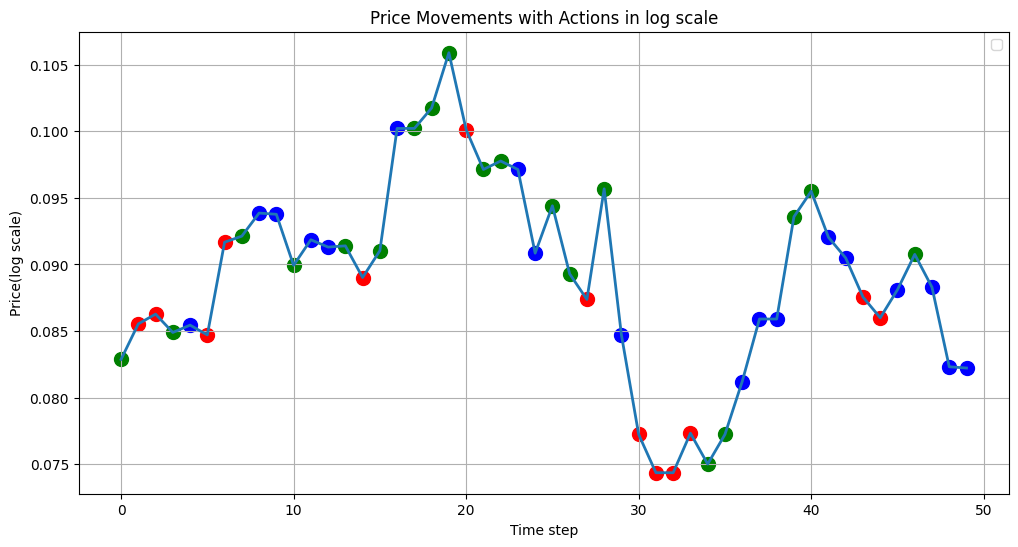

In [29]:
# Combine observations into a single array
combined_observations = np.array(observation_arr)

plt.figure(figsize=(12, 6))

# Plot price movements (observation index 0)
plt.plot(combined_observations[:, 0], linewidth=2)  #label='Price Movements', linewidth=2)

# Plot action dots
for t, action in enumerate(action_arr):

    if action == 0:  # Buy: Colored: Green
        plt.scatter(t, combined_observations[t, 0], color='green', s=100)
    elif action == 1:  # Sell: Colored: Red
        plt.scatter(t, combined_observations[t, 0], color='red', s=100)
    elif action == 2:  # Hold: Colored: Blue
        plt.scatter(t, combined_observations[t, 0], color='blue', s=100)

plt.xlabel('Time step')
plt.ylabel('Price(log scale)')
plt.title('Price Movements with Actions in log scale')
plt.legend()
plt.grid()

plt.show()

<ipython-input-34-9743931bbcae>:2: RuntimeWarning: overflow encountered in exp
  combined_observations = np.exp(np.array(observation_arr))-eps


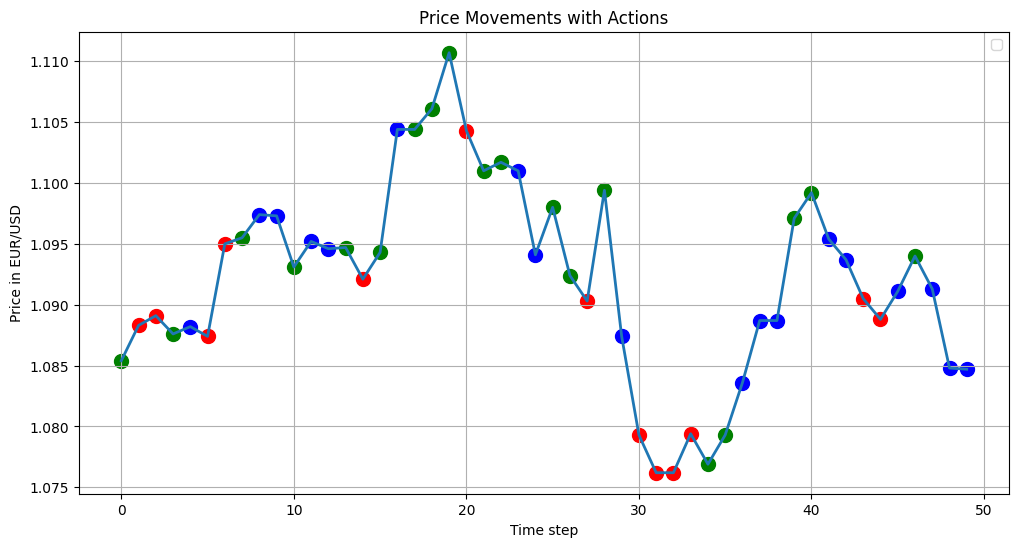

In [34]:
# Combine observations into a single array
combined_observations = np.exp(np.array(observation_arr))-eps

plt.figure(figsize=(12, 6))

# Plot price movements (observation index 0)
plt.plot(combined_observations[:, 0], linewidth=2)  #label='Price Movements', linewidth=2)

# Plot action dots
for t, action in enumerate(action_arr):

    if action == 0:  # Buy: Colored: Green
        plt.scatter(t, combined_observations[t, 0], color='green', s=100)
    elif action == 1:  # Sell: Colored: Red
        plt.scatter(t, combined_observations[t, 0], color='red', s=100)
    elif action == 2:  # Hold: Colored: Blue
        plt.scatter(t, combined_observations[t, 0], color='blue', s=100)

plt.xlabel('Time step')
plt.ylabel('Price in EUR/USD')
plt.title('Price Movements with Actions')
plt.legend()
plt.grid()

plt.show()

In [30]:
model.save('/content/Forexbot_Model')